In [86]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt 
import seaborn as sns
import prophet
from prophet import Prophet 
from prophet.plot import plot_plotly, plot_components_plotly
from plotly import graph_objs as go

In [87]:
# loading in the datasets
df = pd.read_csv("./DailyDelhiClimateTest.csv")
df1 = pd.read_csv("./DailyDelhiClimateTrain.csv")
print(df.tail())
print(df1.tail())

           date  meantemp   humidity  wind_speed  meanpressure
109  2017-04-20    34.500  27.500000    5.562500    998.625000
110  2017-04-21    34.250  39.375000    6.962500    999.875000
111  2017-04-22    32.900  40.900000    8.890000   1001.600000
112  2017-04-23    32.875  27.500000    9.962500   1002.125000
113  2017-04-24    32.000  27.142857   12.157143   1004.142857
            date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000


In [88]:
# removing unwanted data
df1 = df1.drop(index= 1461)
df1.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [89]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [90]:
# joining the datasets
dt = pd.concat([df1, df])
dt.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [91]:
# checking datatypes
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1575 non-null   object 
 1   meantemp      1575 non-null   float64
 2   humidity      1575 non-null   float64
 3   wind_speed    1575 non-null   float64
 4   meanpressure  1575 non-null   float64
dtypes: float64(4), object(1)
memory usage: 73.8+ KB


In [92]:
# changing datatypes
dt["date"] = pd.to_datetime(dt["date"])
dt.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [93]:
# checking datatypes
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1575 non-null   datetime64[ns]
 1   meantemp      1575 non-null   float64       
 2   humidity      1575 non-null   float64       
 3   wind_speed    1575 non-null   float64       
 4   meanpressure  1575 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 73.8 KB


In [94]:
# getting the dataset that will be used for the analysis
dt1 = dt[["date", "meantemp"]]
dt1.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [95]:
# changing column names
dt1.columns = ["ds", "y"]
dt1.head()

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [96]:
dt1

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


In [97]:
dt1["ds"].min()

Timestamp('2013-01-01 00:00:00')

In [98]:
dt1["ds"].max()

Timestamp('2017-04-24 00:00:00')

<Axes: xlabel='ds'>

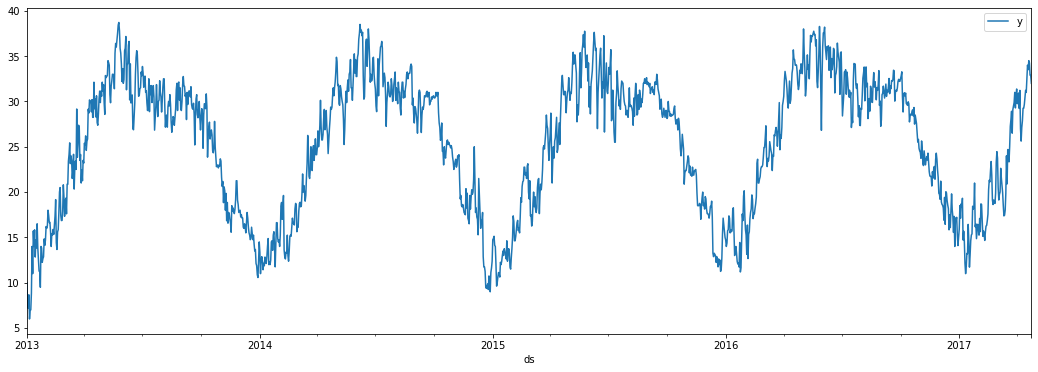

In [99]:
dt1.plot(x = "ds", y = "y", figsize = (18, 6))

In [100]:
# Define the training date range
start_date = '2013-01-01'
end_date = '2016-12-30'
start_date1 = '2017-04-25'
end_date1 = '2017-12-30'

# Filter the DataFrame to select only the training and testing data
train = dt1[(dt1['ds'] >= start_date) & (dt1['ds'] <= end_date)]
test = dt1[(dt1['ds'] >= start_date1) & (dt1['ds'] <= end_date1)]

In [101]:
dt1.shape

(1575, 2)

In [102]:
train.shape

(1460, 2)

In [103]:
test.shape

(0, 2)

In [104]:
# this code sets up and trains a Prophet model (m) on historical time series data (train), 
# generates a DataFrame (future) for future timestamps, 
# and then uses the trained model to make forecasts for those future timestamps
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 365) #MS - Monthly, H - Hourly
forecast = m.predict(future) 

00:07:42 - cmdstanpy - INFO - Chain [1] start processing
00:07:42 - cmdstanpy - INFO - Chain [1] done processing


In [105]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.603354,9.246501,14.197382,24.603354,24.603354,-12.884505,-12.884505,-12.884505,0.031542,0.031542,0.031542,-12.916047,-12.916047,-12.916047,0.0,0.0,0.0,11.718850
1,2013-01-02,24.604031,9.259070,14.661314,24.604031,24.604031,-12.746710,-12.746710,-12.746710,0.143623,0.143623,0.143623,-12.890333,-12.890333,-12.890333,0.0,0.0,0.0,11.857321
2,2013-01-03,24.604708,9.379897,14.521518,24.604708,24.604708,-12.785655,-12.785655,-12.785655,0.064378,0.064378,0.064378,-12.850033,-12.850033,-12.850033,0.0,0.0,0.0,11.819053
3,2013-01-04,24.605384,9.149433,14.497136,24.605384,24.605384,-12.772484,-12.772484,-12.772484,0.024617,0.024617,0.024617,-12.797101,-12.797101,-12.797101,0.0,0.0,0.0,11.832901
4,2013-01-05,24.606061,9.181769,14.381822,24.606061,24.606061,-12.807744,-12.807744,-12.807744,-0.074216,-0.074216,-0.074216,-12.733528,-12.733528,-12.733528,0.0,0.0,0.0,11.798317


In [106]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2017-12-26,28.890321,13.764956,19.051188,28.371502,29.385274,-12.612736,-12.612736,-12.612736,0.031542,0.031542,0.031542,-12.644278,-12.644278,-12.644278,0.0,0.0,0.0,16.277585
1821,2017-12-27,28.893821,13.690104,18.963844,28.372226,29.390191,-12.601072,-12.601072,-12.601072,0.143623,0.143623,0.143623,-12.744694,-12.744694,-12.744694,0.0,0.0,0.0,16.292750
1822,2017-12-28,28.897322,13.410905,18.812686,28.373714,29.394476,-12.757775,-12.757775,-12.757775,0.064378,0.064378,0.064378,-12.822153,-12.822153,-12.822153,0.0,0.0,0.0,16.139547
1823,2017-12-29,28.900822,13.357687,18.676134,28.374623,29.398761,-12.852686,-12.852686,-12.852686,0.024617,0.024617,0.024617,-12.877304,-12.877304,-12.877304,0.0,0.0,0.0,16.048136
1824,2017-12-30,28.904323,13.370975,18.661111,28.376593,29.404663,-12.985333,-12.985333,-12.985333,-0.074216,-0.074216,-0.074216,-12.911117,-12.911117,-12.911117,0.0,0.0,0.0,15.918990


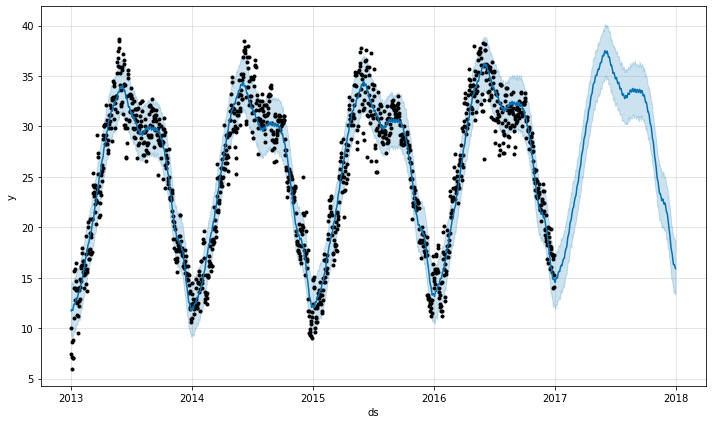

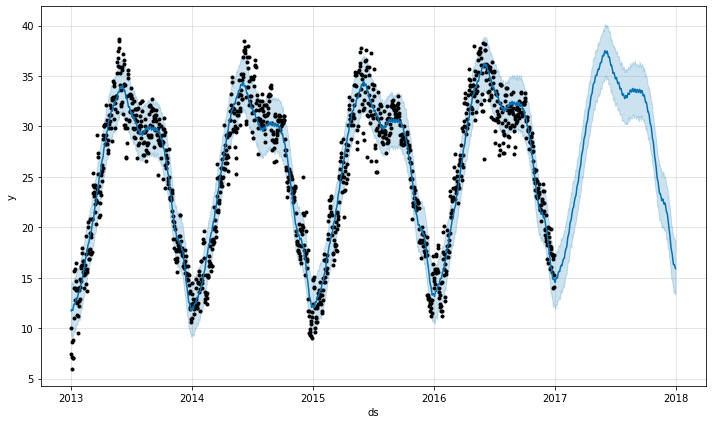

In [107]:
# plotting the forecasted data
m.plot(forecast)

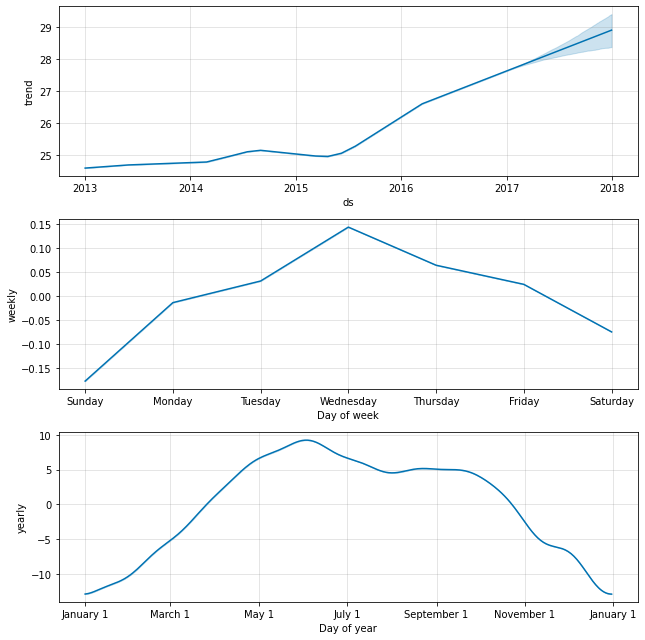

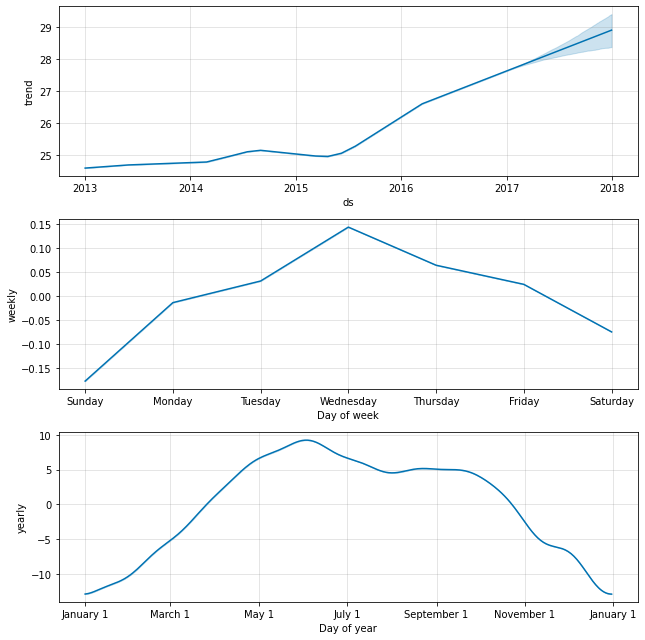

In [108]:
# this code is used to create a set of visualizations that display the individual components of the time series forecast
m.plot_components(forecast)

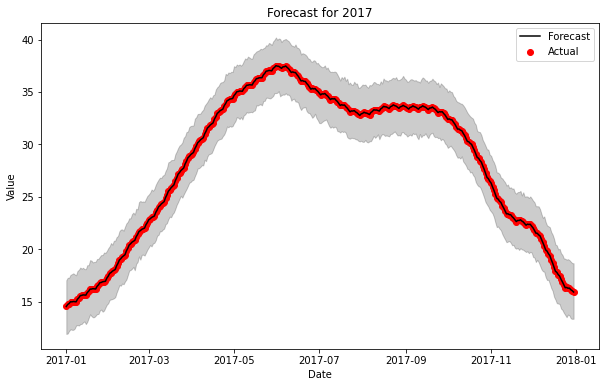

In [109]:
# Filter the forecast data for 2017
forecast_2017 = forecast[forecast['ds'].dt.year == 2017]

# Plot the forecasted data for 2017
plt.figure(figsize=(10, 6))
plt.plot(forecast_2017['ds'], forecast_2017['yhat'], label='Forecast', color='black')
plt.fill_between(forecast_2017['ds'], forecast_2017['yhat_lower'], forecast_2017['yhat_upper'], color='k', alpha=0.2)
plt.scatter(forecast_2017['ds'], forecast_2017['yhat'], label='Actual', color='r')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast for 2017')
plt.legend()
plt.show()

In [110]:
# performs cross-validation using the Prophet library for time series forecasting
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = "300 days")
df_cv 

  0%|          | 0/2 [00:00<?, ?it/s]00:07:48 - cmdstanpy - INFO - Chain [1] start processing
00:07:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  1.42it/s]00:07:49 - cmdstanpy - INFO - Chain [1] start processing
00:07:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-10-08,27.856299,25.192360,30.700768,28.375000,2015-10-07
1,2015-10-09,27.605257,24.951807,30.145673,28.500000,2015-10-07
2,2015-10-10,27.386282,24.874082,29.938068,28.500000,2015-10-07
3,2015-10-11,27.086874,24.571858,29.732072,28.571429,2015-10-07
4,2015-10-12,27.199127,24.517407,29.778299,29.250000,2015-10-07
...,...,...,...,...,...,...
595,2016-12-26,16.715979,14.010673,19.466990,17.142857,2016-03-05
596,2016-12-27,16.691080,14.135853,19.252822,16.850000,2016-03-05
597,2016-12-28,16.754309,14.248614,19.236338,17.217391,2016-03-05
598,2016-12-29,16.598724,14.051512,19.140205,15.238095,2016-03-05


In [111]:
# compute performance metrics based on the results of cross-validation
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p 

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,3.180677,1.783445,1.468153,0.054800,0.049204,0.056110,0.900000
1,31 days,3.420216,1.849383,1.534731,0.057075,0.051095,0.058526,0.883333
2,32 days,3.544190,1.882602,1.574671,0.058582,0.052045,0.060126,0.883333
3,33 days,3.587806,1.894150,1.593001,0.059479,0.053836,0.061075,0.883333
4,34 days,3.701704,1.923981,1.608740,0.060411,0.056387,0.062142,0.866667
...,...,...,...,...,...,...,...,...
266,296 days,4.705590,2.169237,1.771068,0.077746,0.057374,0.074489,0.716667
267,297 days,4.537056,2.130037,1.732246,0.076822,0.057374,0.073407,0.733333
268,298 days,4.531947,2.128837,1.723427,0.076642,0.057374,0.073235,0.733333
269,299 days,4.372147,2.090968,1.678591,0.075499,0.057083,0.072155,0.750000


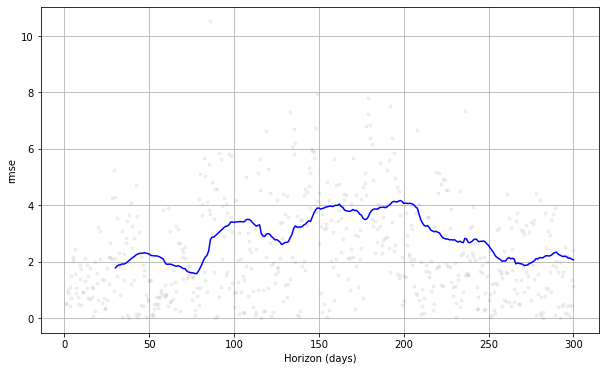

In [112]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Root Mean Squared Error (RMSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "rmse")

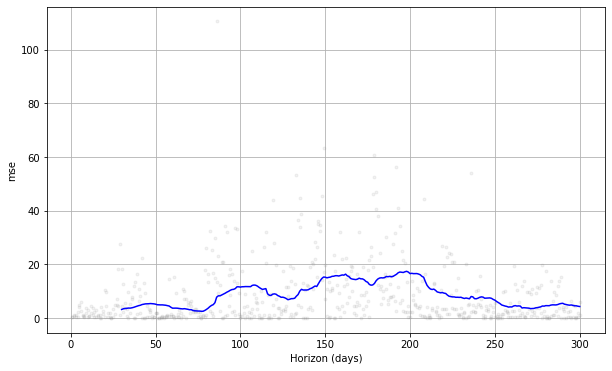

In [113]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Squared Error (MSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mse")

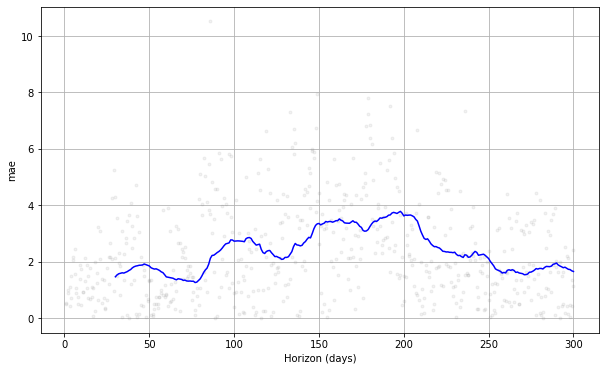

In [114]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Absolute Error (MAE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mae")